In [1]:
from utilities import load_data
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x, y, z = load_data(shuffle=False)

In [3]:
index = []
start = 0
for i in range(len(y)):
    if y[i] != start:
        index.append(i)
        start += 1
index.append(len(y - 1))
print('the splitter index for each class:\n', index)

[0, 1929, 18051, 26055, 28746, 31485, 45620, 48459, 56923, 61878]

In [4]:
a, b = x.shape

In [5]:
split_class = {i: x[index[i-1]: index[i]] for i in range(1, 10)}
summation = np.zeros((9, 93))
for i in split_class:
    for j in range(b):
        summation[i-1][j] = np.sum(split_class[i][:, j])

In [6]:
x_1 = np.copy(x)
for i in range(a):
    for j in range(b):
        if x[i][j] != 0:
            x_1[i][j] = 1

split_class_1 = {i: x_1[index[i-1]: index[i]] for i in range(1, 10)}
counter = np.zeros((9, 93))
for i in split_class_1:
    for j in range(b):
        counter[i-1][j] = np.sum(split_class_1[i][:, j])

x_label = [i for i in range(1, 94)]
for i in range(93):
    if x_label[i] % 10 == 0:
        x_label[i] = str(x_label[i])
        continue
    coef = x_label[i] // 10
    x_label[i] %= 10
    x_label[i] = coef*' ' + str(x_label[i]) +  coef*' '
    

In [7]:
zero_points = list()
for i in counter:
    current = list()
    for j in range(b):
        if i[j] == 0:
            current.append(j)
    zero_points.append(current)
print(zero_points)

[[], [], [], [], [], [], [], [], []]

## Plot that shows the amount of appearance of each feature non-zero value for each class

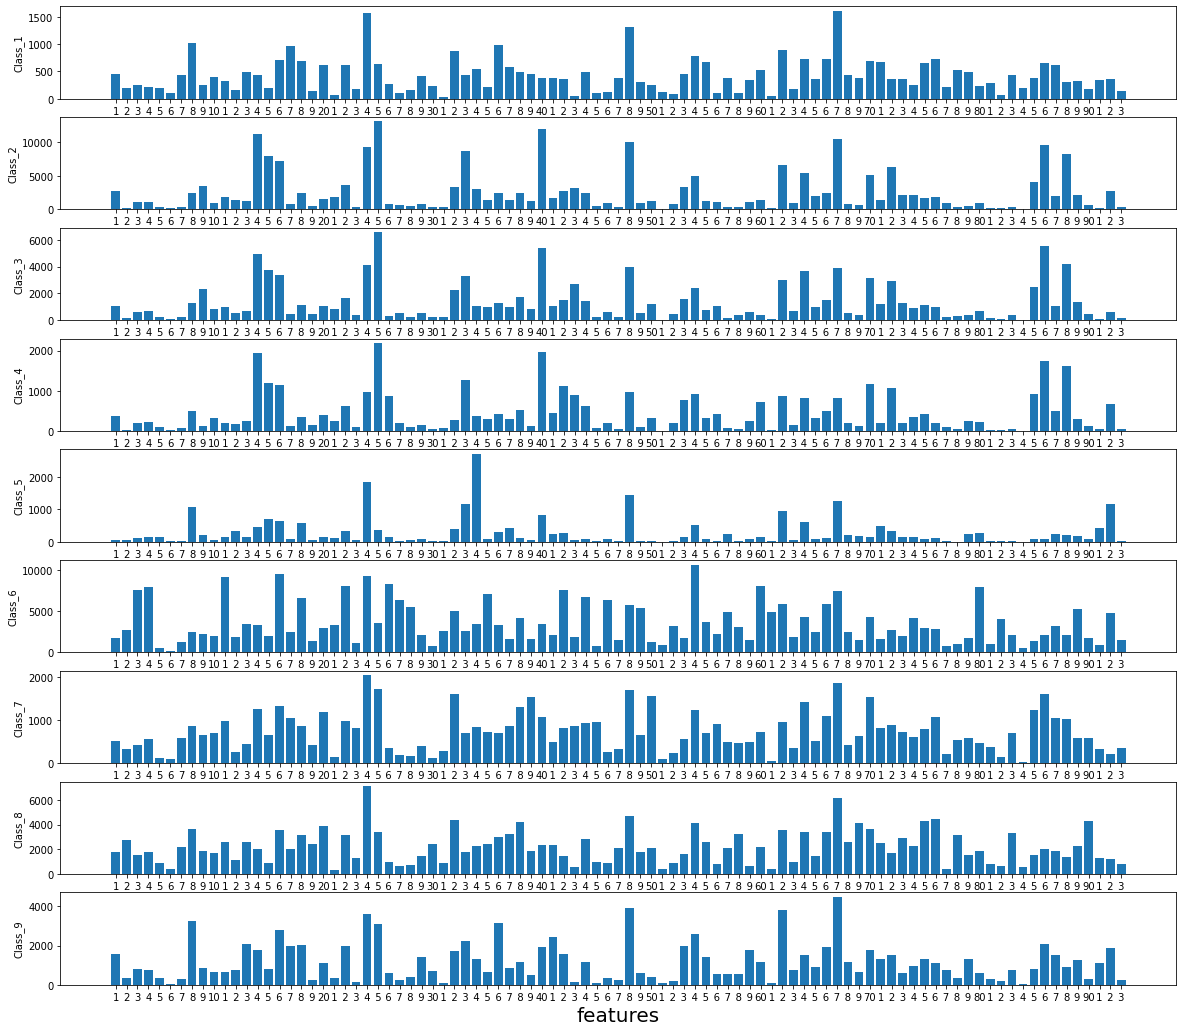

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure(figsize=(20, 18))
for i in range(len(counter)):
    plt.subplot(9, 1, i+1)
    plt.ylabel(f'Class_{i+1}')
    plt.bar(x_label, counter[i])
plt.xlabel('features', fontsize=20)
plt.savefig('feature_appreance.jpg')
plt.show()
plt.clf()

## Plot that shows the summation of each feature value for each class

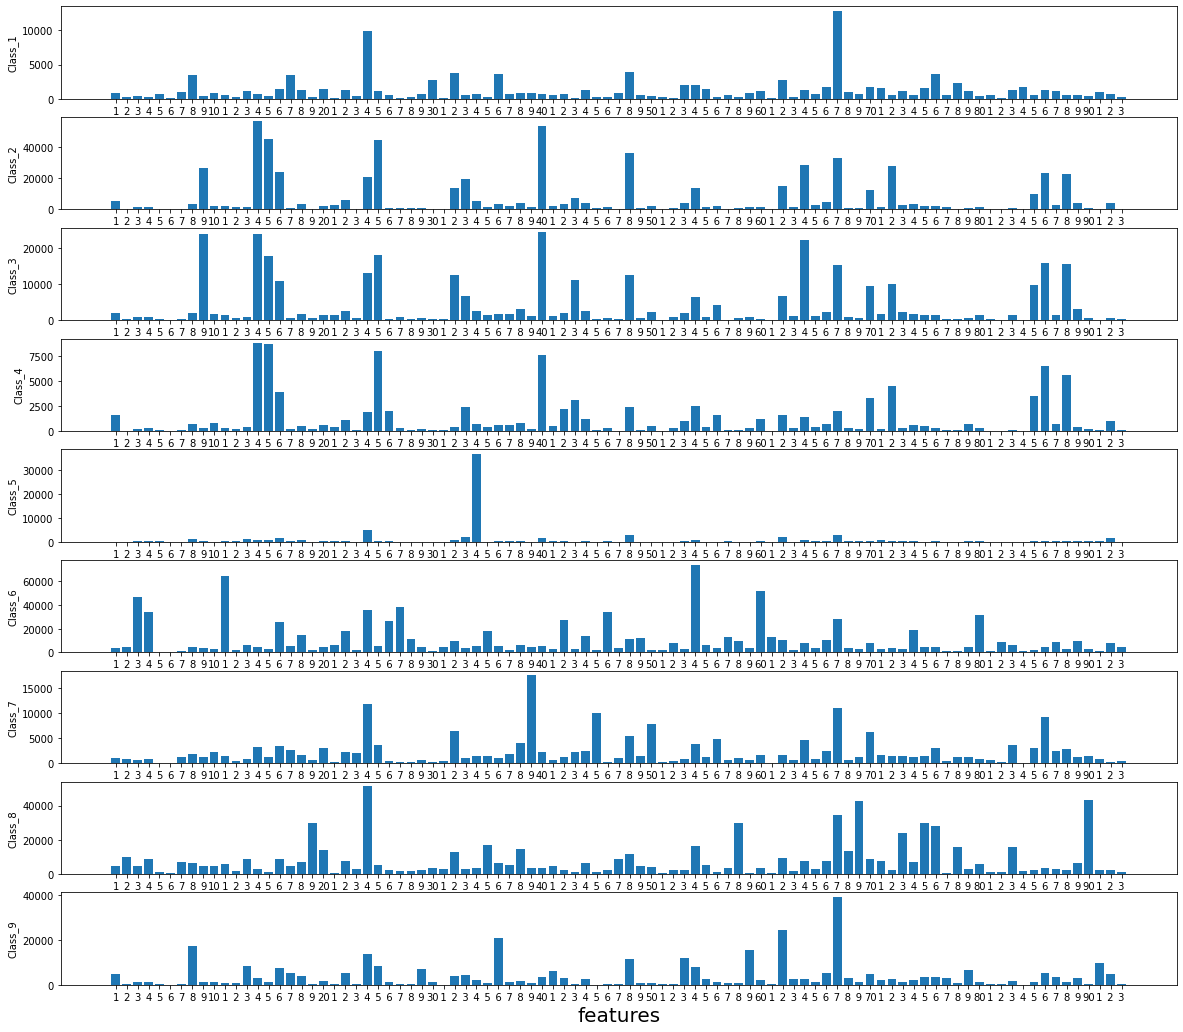

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(20, 18))
for i in range(len(summation)):
    plt.subplot(9, 1, i+1)
    plt.ylabel(f'Class_{i+1}')
    plt.bar(x_label, summation[i])
plt.xlabel('features', fontsize=20)
plt.savefig('feature_value_summation.jpg')
plt.show()
plt.clf()